In [2]:
#READING IN LIBRARIES

%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr     
import pandas as pd
from matplotlib import dates
hfmt = dates.DateFormatter('%H:%M')
from datetime import datetime
import datetime as dt


Populating the interactive namespace from numpy and matplotlib


In [44]:
geonor = pd.read_csv('GEONOR28.txt', delimiter='\t', index_col='TIMESTAMP1', parse_dates=True)
time = geonor.index

geonor_depth = geonor['Geonor_Depth_Raw1']
pres = geonor['Abs_Pressure_Avg1']
temp = geonor['Air_Temp_Avg1']
windspd = geonor['Wspd_Avg1']
time = geonor.index
#time = pd.to_datetime(geonor['TIMESTAMP1'])
rate = geonor['Precip_Rate1']
rh  = geonor['Rel_Hum_Avg1']
Wdir_Vct  = geonor['Wdir_Vct']

# wdirpd = pd.Series(windspd)
# Wdir_Vctnew = pd.rolling_mean(wdirpd,5)

# wdspdpd = pd.Series(pres)
# windspdnew = pd.rolling_mean(wdspdpd,5)


timeutc = time + pd.Timedelta(5,unit='h')

data = np.load('AllTheDSDs.npy').item()
Par2 = data['Par_2']
MRR2 = data['MRR_2']
MPS2 = data['MPS_2']

Newpar = Par2.keys()
NewMPS = MPS2.keys()
NewMRR = MRR2.keys()

RR_MPS = MPS2['RR']
timeMPS = MPS2['time_1s']
RR_Par = Par2['R']
timePar = Par2['time']
RR_MRR = MRR2['R']
timeMRR = MRR2['time']


RR_MPSavg = pd.Series(RR_MPS)
RR_MPSnew = pd.rolling_mean(RR_MPSavg,600,center=True)

/net/san-a1-ib/data/keeling/a/engelse2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=600,center=True).mean()


In [45]:
# datetime_object = np.zeros(len(time),dtype=object)
# for i in np.arange(0,len(time)):
#     datetime_object[i] = datetime.strptime(timeutc.index.values[i], '%H:%M')
#     datetime_object[i] = datetime_object[i] + dt.timedelta(hours = 5)


In [50]:
timeMPS

array([datetime.datetime(2017, 4, 28, 16, 16, 31, 691406),
       datetime.datetime(2017, 4, 28, 16, 16, 32, 691406),
       datetime.datetime(2017, 4, 28, 16, 16, 33, 695312), ...,
       datetime.datetime(2017, 4, 28, 22, 12, 28, 699219),
       datetime.datetime(2017, 4, 28, 22, 12, 29, 695312),
       datetime.datetime(2017, 4, 28, 22, 12, 30, 691406)], dtype=object)

In [51]:
timeutc

DatetimeIndex(['2017-04-28 15:56:00', '2017-04-28 15:57:00',
               '2017-04-28 15:58:00', '2017-04-28 15:59:00',
               '2017-04-28 16:00:00', '2017-04-28 16:01:00',
               '2017-04-28 16:02:00', '2017-04-28 16:03:00',
               '2017-04-28 16:04:00', '2017-04-28 16:05:00',
               ...
               '2017-04-28 21:58:00', '2017-04-28 21:59:00',
               '2017-04-28 22:00:00', '2017-04-28 22:01:00',
               '2017-04-28 22:02:00', '2017-04-28 22:03:00',
               '2017-04-28 22:04:00', '2017-04-28 22:05:00',
               '2017-04-28 22:06:00', '2017-04-28 22:07:00'],
              dtype='datetime64[ns]', name=u'TIMESTAMP1', length=372, freq='T')

In [46]:
newarray = np.empty(len(geonor_depth))
newarray2 = np.empty(len(geonor_depth))
for i in np.arange(0,len(geonor_depth)):
    newarray[i] = geonor_depth[i]
    newarray2[i] = geonor_depth[i]
    
for i in np.arange(1,newarray.shape[0]):
    if newarray[i] < newarray[i-1]:
        newarray[i] = newarray[i-1]
        
newarray[0] = geonor_depth[0]
new_rate = np.diff(newarray)
new_rate1 = np.insert(new_rate,0,0)
new_rate2 = new_rate1 * 60

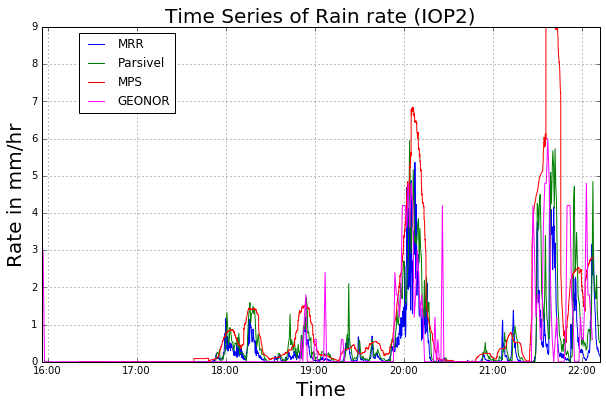

In [48]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rate in mm/hr', fontsize=20)
plt.title('Time Series of Rain rate (IOP2)', fontsize=20)
#plt.yscale('log')
plt.ylim(0,9)
grid('on')
plt.plot(timeMRR,RR_MRR,color="blue",label="MRR")
plt.plot(timePar,RR_Par,color="green",label="Parsivel")
plt.plot(timeMPS,RR_MPSnew,color="red",label="MPS")
plt.plot(timeutc,new_rate2,color="magenta",label="GEONOR")
plt.legend(bbox_to_anchor=(.25, 1.0), loc=1)


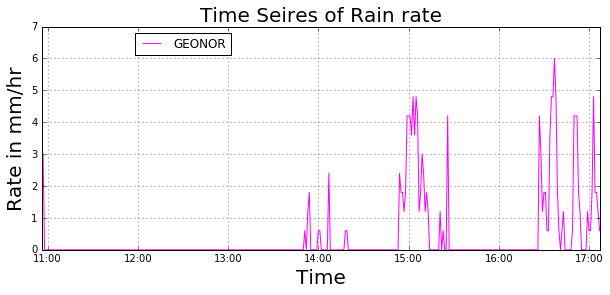

In [24]:
plt.figure(figsize=(10,4))
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rate in mm/hr', fontsize=20)
plt.title('Time Seires of Rain rate', fontsize=20)
grid('on')
plt.plot(time,new_rate2,color="magenta",label="GEONOR")
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)

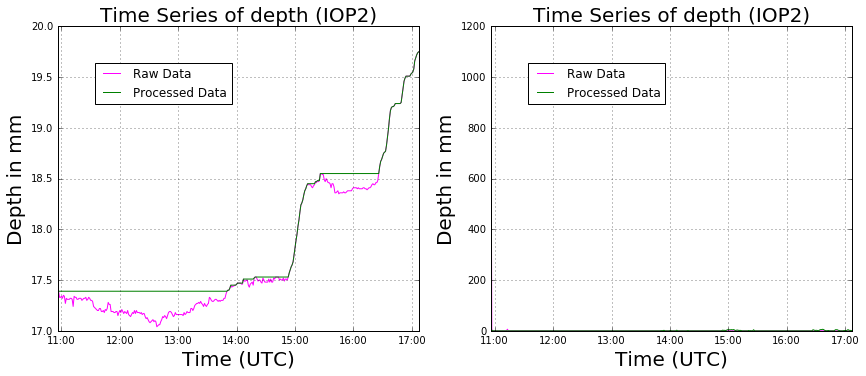

In [54]:
plt.figure(figsize=(22,12))
plt.subplot(2, 3, 1)
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.xlabel('Time (UTC)', fontsize=20)
plt.ylabel('Depth in mm', fontsize=20)
plt.title('Time Series of depth (IOP2)', fontsize=20)
grid('on')
plt.plot(time,geonor_depth,color="magenta", label="Raw Data")
plt.plot(time,newarray,color="green", label="Processed Data")
plt.legend(bbox_to_anchor=(.5, .9), loc=1)

plt.subplot(2, 3, 2)
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.xlabel('Time (UTC)', fontsize=20)
plt.ylabel('Depth in mm', fontsize=20)
plt.title('Time Series of depth (IOP2)', fontsize=20)
grid('on')
plt.plot(time,rate,color="magenta", label="Raw Data")
plt.plot(time,new_rate2,color="green", label="Processed Data")
plt.legend(bbox_to_anchor=(.5, .9), loc=1)


ValueError: x and y must have same first dimension

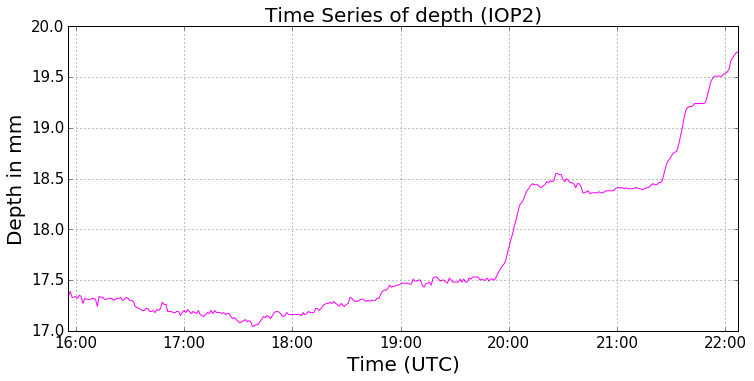

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.xlabel('Time (UTC)', fontsize=20)
plt.ylabel('Depth in mm', fontsize=20)
plt.title('Time Series of depth (IOP2)', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
grid('on')
plt.plot(datetime_object,geonor_depth,color="magenta", label="Raw Data")
plt.plot(datetime_object,rateMRR,color="blue", label="Raw Data")
plt.plot(datetime_object,newarray,color="green", label="Processed Data")
plt.legend(bbox_to_anchor=(.5, .9), loc=1)

# plt.subplot(2, 3, 2)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)
# plt.xlabel('Time (UTC)', fontsize=20)
# plt.ylabel('Wind direction in degrees', fontsize=20)
# plt.title('Time Seires of Wind direction (IOP2)', fontsize=20)
# grid('on')
# plt.plot(datetime_object,Wdir_Vctnew,color="black")

# plt.subplot(2, 3, 3)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)
# plt.xlabel('Time (UTC)', fontsize=20)
# plt.ylabel('Temperature (C)', fontsize=20)
# plt.title('Time Series of Temperature (IOP2)', fontsize=20)
# grid('on')
# # plt.xlabel('Time (UTC)', fontsize=20)
# # plt.ylabel('Pressure (mb)', fontsize=20)
# # plt.title('Time Series of Pressure (IOP1)', fontsize=20)
# grid('on')
# plt.plot(datetime_object,windspdnew,color="blue")

# plt.subplot(2, 1, 2)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)
# plt.xlabel('Time (UTC)', fontsize=20)
# plt.ylabel('RH (%)', fontsize=20)
# plt.ylim(75,100)
# plt.title('Time Series of RH (IOP2)', fontsize=20)
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# grid('on')
# plt.plot(datetime_object,temp,color="green")

# plt.subplot(2, 3, 5)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)
# plt.xlabel('Time (UTC)', fontsize=20)
# plt.ylabel('Pressure (mb)', fontsize=20)
# plt.title('Time Series of Pressure (IOP2)', fontsize=20)
# # plt.xlabel('Time (UTC)', fontsize=20)
# # plt.ylabel('Temperature (C)', fontsize=20)
# # plt.title('Time Series of Temperature (IOP1)', fontsize=20)
# grid('on')
# plt.plot(datetime_object,rh,color="red")

# plt.subplot(2, 3, 6)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)
# plt.xlabel('Time (UTC)', fontsize=20)
# plt.ylabel('Windspeed (m/s)', fontsize=20)
# plt.title('Time Series of Windspeed (IOP2)', fontsize=20)
# grid('on')
# plt.plot(datetime_object,pres,color="magenta")